<h1><center><u>Project: Investigate a Dataset : TMDB Movie Data</u></center></h1>

<h2><u>Table of Contents</u></h2>
 <ul>
    <li>Introduction</li>
    <li>Data Wrangling</li>
    <li>Exploratory Data Analysis</li>
    <li>Conclusions</li>
 </ul>
   

 <h2><u>Introduction</u></h2>
 

  -  In this project, I am investigating a TMDB movies dataset. 
  -  The dataset contains information of 10865 movies.
  -  The source of this data is www.kaggle.com. 
  -  The dataset contains information like details of budget, runtime of movies, revenue, vote_Avg, popularity, release_year etc of the movies.
  -  The dataset contains information on movies from year 1960 to 2015.
  
  
  
- <h4> <u> Importing all the required libraries....</u></h4>


In [1]:
import numpy as np
from datetime import datetime # operations to parse dates
import csv                    # read and write csv files
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
tmdb = pd.read_csv('tmdb-movies.csv') #This function is used to read the csv file.
#This variable will store the database of tmdb movies.

- <b>Displaying first 5 lines of tmdb-movies dataset:</b>

In [2]:
Intro_tmdb = pd.read_csv('tmdb-movies.csv') #This function is used to read the csv file.
Intro_tmdb.head() #This function is use to read the first 5 lines of the dataset.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 - <h3>The Analysis and Posed Questions are:</h3>

Q1. Let's see some overall analysis of different columns.

Q2. Computing Similiar Analytics: 
What are the movies with max and min
- Popularity
- Budget
- Revenue
- Profit


Q3. What are the top 10 movies by rating?

Q4. What is the Count of movies based on rating category?

Q5. What attributes do the most profitable movie have?</b>
     -   Average duration of movies.
     -   Average Budget.
     -   Average revenue.
     -   Average profits.
     -   Which director directed most films?
     -   Whcih cast has appeared the most?
     -   Which genre were more successful?
     -   Which month released highest number of movies in all of the years? And which month made the most profit?

Q6. In which month we had the most movies making profits?

Q7. Genre wise, no. of movies released per year...

Q8. What is relationship between various parameters..
<h5>*Before answering these questions data needs to be cleaned.*</h5>



<h2><u>Data Wrangling</u></h2>


<h5> 1) What all needs to be cleaned or corrected?</h5>

We will check whether all the values of the variables are valid or not i.e. non-null or non 0. We will also see in what way  this data can be trimmed so we can have only those columns which we need and remove unwanted columns. This will also make our dataset clean and easy for us to calculate what we want.
 - In this database of movies there are lots of movies where the budget_adj or revenue_adj have a value of <font color='red'>'0'</font> which means that the values of those variables has not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we need to delete these rows.
 - Also this dataset has some duplicate rows. We have to clean that too.
 - For average runtime of the movies we have a replace <font color='red'>'0'</font> with <font              color='red'>'NaN</font>'.
 - We have to check if all columns are in the desired data type, if not then we have to change it.
 - Unnecessory columns needs to be removed such as *<font color='red'>imdb_id, budget, revenue, homepage, keywords,                        overview, production_companies, tagline.</font>*This needs to be done because either these columns contain a large no. of null values or doesn't seem to be promising enough to be fit for some analysis.

 - The outliers were as such not found. ( Those with value 0 were removed as mentioned in first point).

##### 2) Removing Unwanted Columns From Dataset

In [3]:
del_col = [ 'imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'production_companies', 'tagline']
#deleting the columns from the database
tmdb = tmdb.drop(del_col, 1)
#now take a look at this new dataset
tmdb.head(3)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


##### 3) Replacing 0 valued cells with NaN:

Lets see if we have any movie with a runtime, budget_adj, revenue_adj value of 0. If we have any, we will replace with NaN. This is because these values may not have been recorded when data was collected so we will ignore them in analysis and if required we may remove them.


In [4]:
#replacing 0 with NaN of runtime column of the dataframe
tmdb['runtime'] = tmdb['runtime'].replace(0, np.NaN)
tmdb['budget_adj'] = tmdb['budget_adj'].replace(0, np.NaN)
tmdb['revenue_adj'] = tmdb['revenue_adj'].replace(0, np.NaN)

##### 4) General Properties of data: 

In [5]:
rows, col = tmdb.shape
#since 'rows' includes count of a header, we need to avoid its count.
print('We have {} total entries of movies and {} columns/features of it.\n\n'.format(rows-1, col))
tmdb.info()

We have 10865 total entries of movies and 13 columns/features of it.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10835 non-null float64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        5170 non-null float64
revenue_adj       4850 non-null float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.1+ MB


##### 5) Handling Null Values:

- Checking which columns have Null Values...

In [6]:
tmdb.isnull().sum()

id                   0
popularity           0
original_title       0
cast                76
director            44
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

- Removing rows having Null values

In [7]:
tmdb.dropna(subset=['cast', 'director', 'genres','budget_adj','revenue_adj'],how='any', inplace=True)
tmdb.isnull().sum()

id                0
popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

##### 6) Handling duplicates:
- Checking Duplicates....

In [8]:
sum(tmdb.duplicated())

1

- Removing Duplicates....

In [9]:
tmdb=tmdb.drop_duplicates(keep=False)
tmdb.duplicated().sum()

0

In [10]:
tmdb.shape

(3848, 13)

##### 7) Lets see if all the columns are in the format that we want for our calculations:

In [11]:
#showing the datatypes of all the columns
tmdb.dtypes

id                  int64
popularity        float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

*1. We can see that we have float values for 'budget_adj' and 'revenue_adj' columns, since we dont need float but in int datatype, lets convert them.*


*2. We need to convert the 'release_date' column to date format.*


 - Converting budget_adj and revenue_adj from float to int.

In [12]:
change_coltype = ['budget_adj', 'revenue_adj']
tmdb[change_coltype] = tmdb[change_coltype].applymap(np.int64)
tmdb.dtypes


id                  int64
popularity        float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj          int64
revenue_adj         int64
dtype: object

- converting date to datetime format

In [13]:
#calling the column which need to be formatted in datetime and storing those values in them
tmdb.release_date = pd.to_datetime(tmdb['release_date'])

#showing the dataset
tmdb.head(2)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292


Now all columns are in the desired format.

##### Lets proceed to Analysis...

## <u>Exploratory Data Analysis</u>

Making separate column on profit for further analysis...

In [14]:
#To calculate profit of each movie, we need to substract the budget from the revenue of each movie
tmdb.insert(2, 'profit_adj', tmdb['revenue_adj'] - tmdb['budget_adj'])

#showing the dataset
tmdb.head(2)

,id,popularity,profit_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1254445953,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,210161353,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292


### Q1. Let's see some overall analysis of various columns: 

In [15]:
tmdb.describe()

,id,popularity,profit_adj,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3848.000000,3848.000000,3.848000e+03,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03,3.848000e+03
mean,39884.546778,1.193088,9.296941e+07,109.221933,528.495842,6.168997,2001.255977,4.429732e+07,1.372667e+08
std,67257.620158,1.475783,1.941869e+08,19.914794,880.422193,0.794577,11.286229,4.481883e+07,2.162187e+08
min,5.000000,0.001117,-4.139124e+08,15.000000,10.000000,2.200000,1960.000000,0.000000e+00,2.000000e+00
25%,6071.000000,0.463291,-1.498934e+06,95.750000,71.000000,5.700000,1995.000000,1.315864e+07,1.843827e+07
50%,11311.000000,0.799015,2.746787e+07,106.000000,205.000000,6.200000,2004.000000,3.007926e+07,6.182197e+07
75%,38569.750000,1.374400,1.075787e+08,119.000000,581.250000,6.700000,2010.000000,6.076720e+07,1.635528e+08
max,417859.000000,32.985763,2.750137e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From above dataframe we see a lot of interesting things:
- <b>Popularity :</b> 
We see although `min popularity is 0.001117` and `max is 32.985` but `mean is only 1.19` i.e. only few movies were really popular.

- <b>Profit_adj :</b> 
We find some movies suffered `loss` as high as `4 hundred million dollars` while some have managed to make `profit` as high as `2.7 billion dollars`.

- <b>Runtime :</b> 
Average runtime of movies is approximately `109 minutes`.

- <b>Vote_average :</b> 
Voting average ranged between `2.2 to 8.4`. While mean voting average was `6.16` .



### Q2 Computing Similiar Analytics: 
What are the movies with max and min

a) Popularity

b) Budget

c) Revenue

d) Profit



Note: The left column shows movie with max and right column shows movie with min.

In [16]:
#Defining a common function which calculates max and min values of columns
#taking column name as arguments

def max_min(col_name):
    
    #Highest
    #taking the index value of the highest number in profit column
    highest = tmdb[col_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(tmdb.loc[highest])
    
    #lowest
    #same processing as above
    lowest = tmdb[col_name].idxmin()
    lowest_details = pd.DataFrame(tmdb.loc[lowest])
    
    #joining two dataframes
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    
    return two_in_one_data

##### a). Popularity :

In [17]:
#calling the function and passing the argument popularity
max_min('popularity')

,0,7268
id,135397,1392
popularity,32.9858,0.001117
profit_adj,1254445953,3653891
original_title,Jurassic World,Born into Brothels
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Zana Briski|Avijit|Geeta Masi|Kochi|Mamuni
director,Colin Trevorrow,Zana Briski|Ross Kauffman
runtime,124,85
genres,Action|Adventure|Science Fiction|Thriller,Documentary
release_date,2015-06-09 00:00:00,2004-12-08 00:00:00
vote_count,5562,23


`Jurassic World` is the movie with max popularity of almost 33.

`Born in Brothels` is movie with least popularity of 0.0011.

###### b). Budget :

In [18]:
max_min('budget_adj')

,2244,3581
id,46528,59296
popularity,0.25054,0.52043
profit_adj,-413912431,1335
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,2011-06-03 00:00:00
vote_count,74,55


`The Warriors Way` had the `highest budget` of all movies in the dataset of about `$425M`. This movie also has a `great loss`.
It makes sense that having the highest budget in all makes the film more harder to have higher revenues and earn more profits.

`Love, Wedding, Marriage` movie has almost `0 budget`.  Also making revenue of `$1335` and earning a `profit $1335`, this may be a local movie release. Because it's kind of impossible to have such low budget and earning low revenues if it has released internationally.

###### c). Revenue :

In [19]:
max_min('revenue_adj')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
profit_adj,2586236848,-7112113
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46


`Avatar movie` has made `most revenue`! Making a revenue of more than `$2.8B`.
It seems that the more revenue the movie earns the more profit they gained.
We also saw in earlier result, The Warriors Way having most budget had less chance of making profits. 
It really looks that `there's correlation between profit and budget/revenue` but we can't say just by looking at few results.

Having `lowest revenue of $2`, `Shattered Glass` movie seems like couldn't sell much tickets.

##### d). Profit :

In [20]:
max_min('profit_adj')

,1329,2244
id,11,46528
popularity,12.0379,0.25054
profit_adj,2750136651,-413912431
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
vote_count,4428,74


The film `Star Wars` has the highest profit in all, making over `$2.7B` in `profit` in this dataset.

And the movie in this dataset with max loss is `The Warriors Way`. Going in `loss` by more than `$400M` was directed by Singmoo Lee.

### Q3. What are the top 10 movies by rating?

In [21]:
tmdb_top10 = tmdb.nlargest(10,'vote_average') #movies with top 10 voting average...
tmdb_top10.head(5) # displaying first 5 movies with max voting average.. 

,id,popularity,profit_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4178,278,7.192039,4915673,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,142.0,Drama|Crime,1994-09-10,5754,8.4,1994,36777789,41693462
7948,24128,0.283191,7932116,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,88.0,Documentary|Music,1984-11-16,23,8.4,1984,2518850,10450966
7269,238,5.738034,1246626367,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175.0,Drama|Crime,1972-03-15,3970,8.3,1972,31287365,1277913732
650,244786,4.780419,9849312,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105.0,Drama|Music,2014-10-10,2372,8.2,2014,3039600,12888912
2409,550,8.947905,49552563,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,139.0,Drama,1999-10-14,5923,8.1,1999,82470329,132022892


#### Plotting the graph of Top 10 Movies by Rating

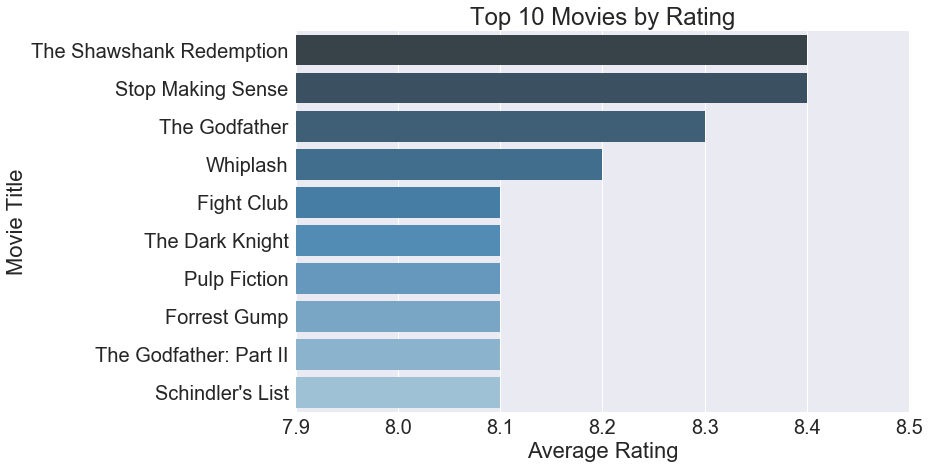

In [22]:
sns.set(style="whitegrid");
sns.set(font_scale=2.0);
f, axis = plt.subplots(figsize=(11, 7));
axis = sns.barplot(x='vote_average', y='original_title', data=tmdb_top10, palette="Blues_d");

axis.set(xlim=(7.9,8.5), ylabel="Movie Title", xlabel="Average Rating");
plt.title('Top 10 Movies by Rating');

#### <B>RESULT -:</B> The maximum Rated movie is <font color='Red'> THE Shawshank Redemption,Stop Making Sense of Rating : 8.4</font> 

### Q4. What is the Count of movies based on rating category?

In [23]:
tmdb.describe()['vote_average']   #calculating and displaying general statistics about vote_average

count    3848.000000
mean        6.168997
std         0.794577
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

#### Using the describe() function of vote_average I created for catagories rating wise:
- "High" for movies greater then 75% values
- "Above Average" for movies between 50% and 75% values
- "Below Average" for movies between 25% and 50% values
- "Low" for movies less than 25% value


In [24]:
peak_val = [2.2, 5.7, 6.2, 6.7, 8.5] # values of vote_averages min, 25%, 50%, 75%, max
catg_names = ['Low','Below Average','Above Average','High'] # Name of categories
tmdb['movie_rating'] = pd.cut(tmdb['vote_average'], peak_val, labels=catg_names)
tmdb.head()

,id,popularity,profit_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_rating
0,135397,32.985763,1254445953,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,Above Average
1,76341,28.419936,210161353,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292,High
2,262500,13.112507,170419070,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025,Above Average
3,140607,11.173104,1718723210,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183999919,1902723129,High
4,168259,9.335014,1210948878,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174799923,1385748801,High


#### Plotting graph  based on Rating Category and Count of movies..

movie_rating
Low              1100
Below Average     938
Above Average     907
High              902
Name: genres, dtype: int64


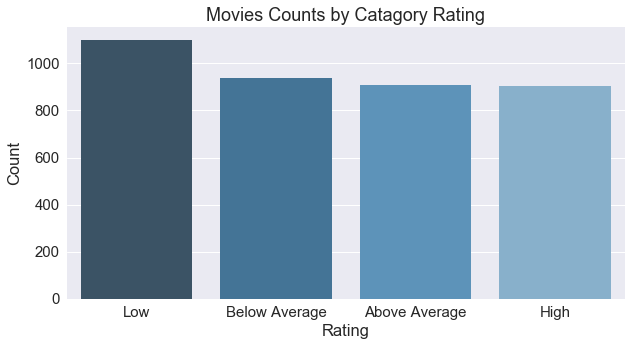

In [25]:
counts = tmdb.groupby('movie_rating').count()['genres'];
print(counts)
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
f, axis = plt.subplots(figsize=(10, 5));

axis = sns.barplot(y=counts.values, x=catg_names, palette="Blues_d");

axis.set( ylabel="Count", xlabel="Rating");
plt.title('Movies Counts by Catagory Rating');


##### <b>Result: The count of movies based on vote_average is...</b>

In [26]:
tmdb.groupby('movie_rating').count()['genres']

movie_rating
Low              1100
Below Average     938
Above Average     907
High              902
Name: genres, dtype: int64

### Q5.What attributes do the most profitable movies have?

##### Seeing the general statistics we take movies scoring profit more then $50000000 to be most profitable ones

In [27]:
profit_adj = tmdb[tmdb['profit_adj'] >= 50000000]

#creating a new dataframe profit_adj with only those movies that have profit greater than 50000000.

#reindexing new dataframe
profit_adj.index = range(len(profit_adj))

#will initialize dataframe from 1 instead of 0
profit_adj.index = profit_adj.index + 1

#showing the dataset
profit_adj.head(2)

,id,popularity,profit_adj,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_rating
1,135397,32.985763,1254445953,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,Above Average
2,76341,28.419936,210161353,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292,High


##### Computing general characteristics of most profitable movies :-

No of movies with profit greater than $50 million

In [28]:
len(profit_adj)                      #no of movies with max profit...

1542

In [29]:
def profit_avg_fuc(column_name):     #common function to compute mean of various parameters of most profitable movies..
    return profit_adj[column_name].mean()

In [30]:
profit_avg_fuc('runtime')            #calculating average 'runtime' of most profitable movies...

113.66990920881972

In [31]:
profit_avg_fuc('budget_adj')         # average 'budget' of most profitable movies... 

64357773.737354085

In [32]:
profit_avg_fuc('revenue_adj')        # average 'revenue' of most profitable movies...

292607785.13942933

In [33]:
profit_avg_fuc('profit_adj')        #average 'profit' of most profitable movies...

228250011.40207523

In [34]:
def extract_data(column_name):      # function to seperate various strings in a column cell seperated by '|'
    #will take a column, and separate the string by '|'
    all_data = profit_adj[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

- #### Top Directors:

In [35]:
director_count = extract_data('director')
#showing top 5 directors
director_count.head()

Steven Spielberg    25
Clint Eastwood      18
Tim Burton          13
Robert Zemeckis     13
Tony Scott          10
dtype: int64

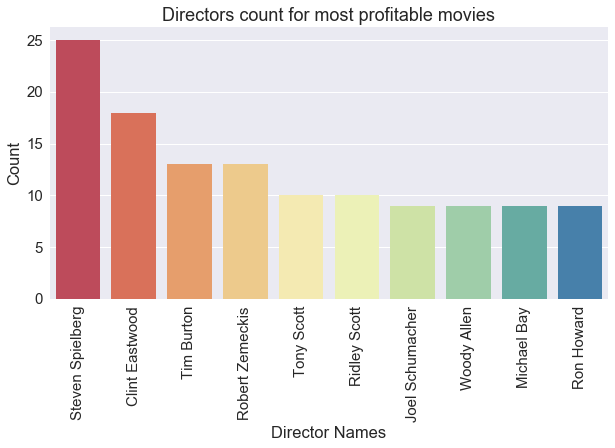

In [36]:
director_graph= director_count.head(10)
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
f, axis = plt.subplots(figsize=(10, 5));

axis = sns.barplot(x=director_graph.index, y=director_graph.values, palette="Spectral");

axis.set( ylabel="Count", xlabel="Director Names");
plt.title('Directors count for most profitable movies');
plt.xticks(rotation=90);

- ##### Top cast members:

In [37]:
cast_count = extract_data('cast')
#showing top 5 cast members
cast_count.head()

Tom Cruise            29
Brad Pitt             25
Tom Hanks             25
Robert De Niro        23
Sylvester Stallone    21
dtype: int64

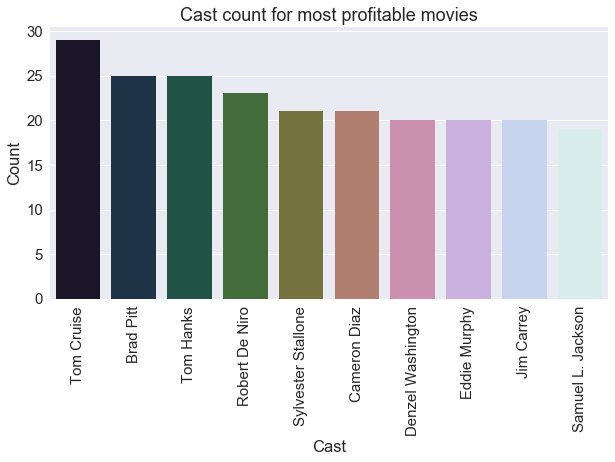

In [38]:
cast_graph= cast_count.head(10)
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
f, axis = plt.subplots(figsize=(10, 5));

axis = sns.barplot(x=cast_graph.index, y=cast_graph.values, palette="cubehelix");

axis.set( ylabel="Count", xlabel="Cast");
plt.title('Cast count for most profitable movies');
plt.xticks(rotation=90);

- ##### Top Genres:

In [39]:
genre_count = extract_data('genres')
#showing top 5 genres
genre_count.head()

Drama        579
Comedy       554
Action       515
Thriller     462
Adventure    418
dtype: int64

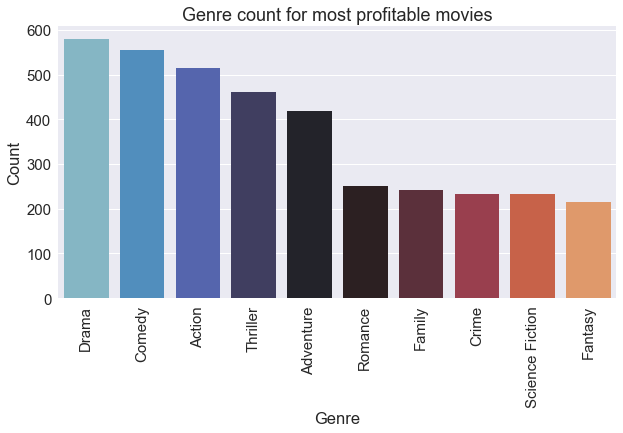

In [40]:
genre_graph= genre_count.head(10)
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
f, axis = plt.subplots(figsize=(10, 5));

axis = sns.barplot(x=genre_graph.index, y=genre_graph.values, palette="icefire");

axis.set( ylabel="Count", xlabel="Genre");
plt.title('Genre count for most profitable movies');
plt.xticks(rotation=90);

In [41]:
Budget_min = profit_adj['budget_adj'].min()
Budget_max = profit_adj['budget_adj'].max()

print(Budget_min, Budget_max)

224 368371256


### Q6. In which month we had the most movies making profits?

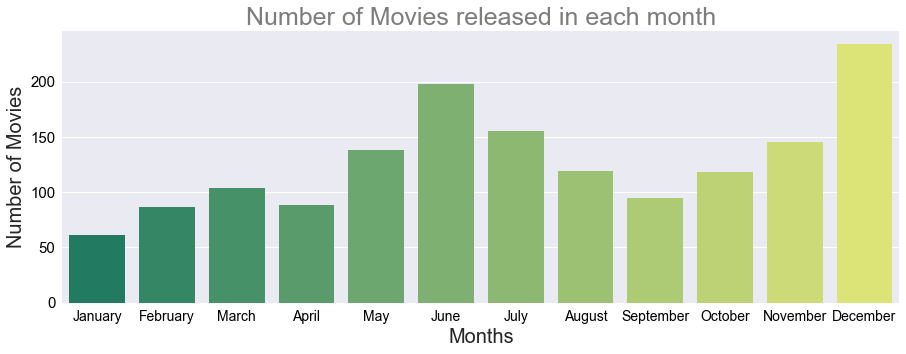

In [42]:
index_release_date = profit_adj.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby(index_release_date.index.month)

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit_adj'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit_adj'], data = monthly_movie_count, palette='summer')

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,5)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", fontsize = 20)

#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", fontsize = 20)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 0, size = 14)

#shows the plot
plt.show()

`Jan` was the month where `least no of movies` were realeased...

`December` was the month where `max no of movies` were realeased...

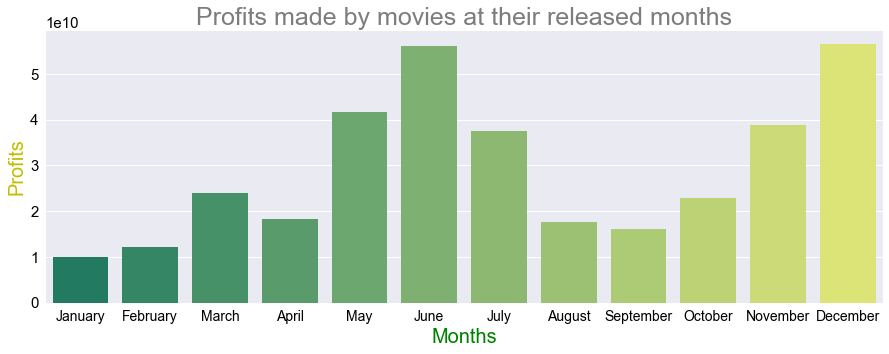

In [43]:
index_release_date = profit_adj.set_index(pd.DatetimeIndex(profit_adj['release_date']))

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])
monthly_profit = groupby_index['profit_adj'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)
monthly_profit= monthly_profit.sort_values(by=['profit_adj'], ascending=[False])

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit_adj'],data = monthly_profit, palette="summer" )

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,5)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 20)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 20)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 0, size = 14)

#shows the plot
plt.show()

The month of `Jan` here also showed to have been the `least profitable`...

`June and December` were the month with `max profit`...

## Q7. Genre wise, no. of movies released per year...

<h4>What is the Number of Produced Movies by Genres?</h4>

Drama              1752
Comedy             1357
Thriller           1202
Action             1084
Adventure           749
Romance             666
Crime               650
Science Fiction     518
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64


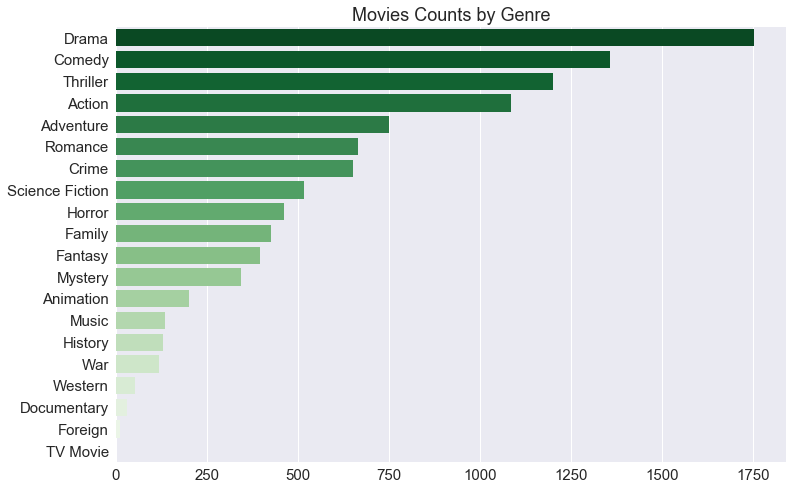

In [44]:
data = tmdb['genres'].str.cat(sep = '|')
    
#giving pandas series and storing the values separately
data = pd.Series(data.split('|'))
    
#this will us value in descending order
count = data.value_counts(ascending = False)
print(count)
graph_plot= count
sns.set_style("darkgrid")
sns.set(font_scale=1.5);
f, graph_plot = plt.subplots(figsize=(12, 8));
graph_plot = sns.barplot(x=count.values, y=count.index, palette="Greens_r");
axis.set( ylabel="Count", xlabel="Genre");
plt.title('Movies Counts by Genre');

#### - Calculating in which year max no of movies of a particular genre were released: 

Text(0.5,52,'Release Year')

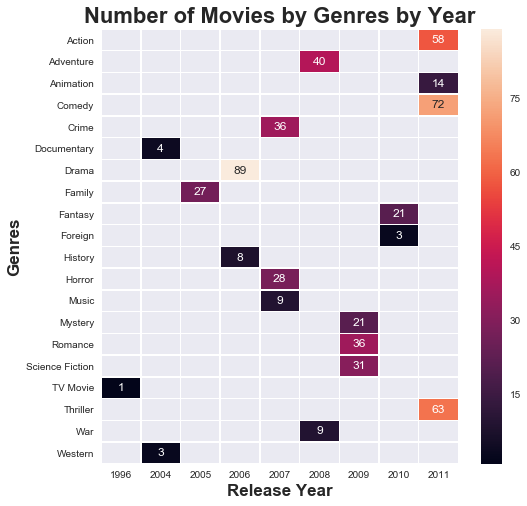

In [45]:
frame = tmdb['genres'].str.split('|').apply(pd.Series, 1).stack()
frame.index = frame.index.droplevel(-1)
frame.name = 'genres'

new_frame = tmdb.copy() # create a copy of the df_clean dataset 
del new_frame['genres']

main_frame = new_frame.join(frame)

chart_df = main_frame.groupby(['genres', 'release_year']).count()['director'].reset_index(name="count")
#chart_df = df.groupby('genres').count()['director'].reset_index(name="count")




genres_count = chart_df.loc[chart_df.groupby(['genres'])['count'].idxmax()]

sns.set(style="darkgrid")

genres = genres_count.pivot("genres", "release_year", "count")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(8, 8))
g = sns.heatmap(genres, annot=True,  linewidths=0.5, ax=ax)
g.set_title("Number of Movies by Genres by Year", fontsize=22, fontweight="bold")
g.set_ylabel("Genres", fontsize=17, fontweight="bold")
g.set_xlabel("Release Year", fontsize=17, fontweight="bold")

##### - To see the depiction more clearly a table is shown below:

The table clearly depicts which genre kind movies were released max no of times in which year....

In [46]:
chart_df.loc[chart_df.groupby(['genres'])['count'].idxmax()]


,genres,release_year,count
50,Action,2011,58
103,Adventure,2008,40
145,Animation,2011,14
196,Comedy,2011,72
244,Crime,2007,36
259,Documentary,2004,4
314,Drama,2006,89
360,Family,2005,27
407,Fantasy,2010,21
421,Foreign,2010,3


### Q8. What is relationship between various parameters..

In [47]:
#using correlation to determine factors influencing revenues
tmdb.corr(method='pearson')

,id,popularity,profit_adj,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.189046,-0.069728,-0.035187,0.111559,-0.000708,0.489974,-0.124086,-0.088344
popularity,0.189046,1.000000,0.516665,0.215444,0.779975,0.317692,0.173698,0.398828,0.546690
profit_adj,-0.069728,0.516665,1.000000,0.235513,0.613912,0.288577,-0.132090,0.404059,0.981859
runtime,-0.035187,0.215444,0.235513,1.000000,0.274143,0.352418,-0.112800,0.334626,0.280878
vote_count,0.111559,0.779975,0.613912,0.274143,1.000000,0.387201,0.207580,0.497638,0.654509
vote_average,-0.000708,0.317692,0.288577,0.352418,0.387201,1.000000,-0.133066,0.036093,0.266654
release_year,0.489974,0.173698,-0.132090,-0.112800,0.207580,-0.133066,1.000000,0.075490,-0.102983
budget_adj,-0.124086,0.398828,0.404059,0.334626,0.497638,0.036093,0.075490,1.000000,0.570172
revenue_adj,-0.088344,0.546690,0.981859,0.280878,0.654509,0.266654,-0.102983,0.570172,1.000000



- Popularity has `STRONG` correlation with `vote_count` and `GOOD` correlation with `profit and revenue_adj`.
- Profit has `STRONG` correlation with `revenue_adj and vote_count` and `GOOD` correlation with `popularity and budget_adj`.
- Runtime, budget_adj and vote_average does not has good correlation with any parameter.
- Revenue_adj has `Very Strong` correlation with `profit`

<h3><u>Conclusion</u></h3>

As I have answered the questions that i thought would be interesting to dig into, i want to wrap up all my findings in this way ....

<h5>Q. If I wanted to show one of the best and most profitable movie, who would I hire as director and cast, which genre would I choose and also at what month would I release the movie in?</h5>

Ans. I would..

 - <B>Choose any director from this</B> *- Steven Spielberg, Clint Eastwood, Tim Burton, Robert Zemeckis, Tony Scott *
 - <B>Choose any cast from this</B> *- Tom Cruise, Tom Hanks, Brad Pitt, Robert De Niro, Sylvester Stallone *
 - <B>Choose these genre</B> - Drama, Comedy, Action, Thriller, Adventure
 - <B>Choose these release months</B> - May, June, July, November, December.
 - <B>Choose budget range between `$224` to  `$368371256`
   
##### Other Analysis:

1. Out of given dataset only `3848` movies contained valid data.

2. `Jurassic World` is the movie with max popularity of almost 33.

3. `Avatar movie` has made most revenue.. Making a revenue of more than $2.8B

4. `Star Wars` film has the highest profit in all, making over $2.7B

5. `Average runtime` of all movies is approx 109 min.

6.  The top rated movies are `The Shawshank Redemption` and `Stop Making Sense` with a rating of 8.4.

7. Movie_rating:
 - Low              1100
 - Below Average     938
 - Above Average     907
 - High              902

8. No. of movies with profit greater than $50 million dollars : 1542

9. `Least no` of profitable movies: `January`.. The month with `max no` of profitable movies `December`...

10. The `least profitable ` month: `Jan`.. 
`June and December` were the months with `max profit`...

11. No of movies released genre wise:
 - Drama              1752
 - Comedy             1357
 - Thriller           1202
 - Action             1084
 - Adventure           749

12. Correlations: 
 - Popularity has `STRONG` correlation with `vote_count` and `GOOD` correlation with `profit and revenue_adj`.
 - Profit has `STRONG` correlation with `revenue_adj and vote_count` and `GOOD` correlation with `popularity and budget_adj`.
 - Runtime, budget_adj and vote_average does not has good correlation with any parameter.
 - Revenue_adj has `Very Strong` correlation with `profit`.

#### Limitations of the dataset and analysis:

1. There is no normalization or exchanges rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue, budget etc.

2. We have not considered type of vote positive or negative or any other value.

3. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards relationship being analyzed.

4. Due to wrangling lot of movie data needed to be removed, so our analysis is limited to partial no. of movies. ( Only those movies whose data was valid and without any null values...)

5. There were lot of movies where the budget_adj or revenue_adj have a value of '0' which means that the values of those variables had not been recorded. Calculating the profits of these movies would lead to inappropriate results. So we needed to delete those rows.

6. Also this dataset had one duplicate row. We had to remove that duplicate row for setting one column(here id) as the index of whole dataset.

7. Unnecessory columns needed to be removed such as imdb_id, budget, revenue, homepage, keywords, overview, production_companies, tagline. This was done because either these contained large no. of null values or didn't seem promising enough to be fit for some analysis.
